In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Load Dataset
df = pd.read_csv('./dataset/Bangalore_AQI_Dataset.csv')
print("Data Loaded Successfully\n")
print(df.head())


Data Loaded Successfully

        City      Date  AQI  PM2.5   PM10    NO2    SO2    CO    O3
0  Bangalore  01/01/18   68   37.4  73.44  56.44  77.52  0.71  64.6
1  Bangalore  02/01/18   76   41.8  82.08  63.08  86.64  0.80  72.2
2  Bangalore  03/01/18   70   38.5  75.60  58.10  79.80  0.74  66.5
3  Bangalore  04/01/18   78   42.9  84.24  64.74  88.92  0.82  74.1
4  Bangalore  05/01/18   82   45.1  88.56  68.06  93.48  0.86  77.9


In [5]:
# Step 3: Select Features and Target
X = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']]
y = df['AQI']

In [7]:
# Step 4: Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
# Step 5: Scale Features (optional but helps stability)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Step 6: Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
# Step 7: Predict AQI Values
y_pred = model.predict(X_test_scaled)

In [15]:
# Step 8: Evaluate Model (Regression Metrics)
print("\nModel Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


Model Evaluation:
R² Score: 1.0
Mean Squared Error: 5.27452122753399e-28
Root Mean Squared Error: 2.2966325843578006e-14


In [17]:
# Step 9: Create DataFrame with Actual vs Predicted AQI
result_df = pd.DataFrame({'Actual_AQI': y_test, 'Predicted_AQI': y_pred})
print("\nActual vs Predicted AQI:\n", result_df.head())


Actual vs Predicted AQI:
       Actual_AQI  Predicted_AQI
1266          64           64.0
1749          41           41.0
2050          50           50.0
393           59           59.0
1544          99           99.0


In [19]:
# Step 10: Convert Predicted AQI into AQI Buckets
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']

In [43]:
# Actual and Predicted AQI Categories
result_df['Actual_Bucket'] = pd.cut(result_df['Actual_AQI'], bins=bins, labels=labels)
result_df['Predicted_Bucket'] = pd.cut(result_df['Predicted_AQI'], bins=bins, labels=labels)


print("\nPredicted AQI Buckets:\n", result_df.head())


Predicted AQI Buckets:
       Actual_AQI  Predicted_AQI Actual_Bucket Predicted_Bucket
1266          64           64.0  Satisfactory     Satisfactory
1749          41           41.0          Good             Good
2050          50           50.0          Good             Good
393           59           59.0  Satisfactory     Satisfactory
1544          99           99.0  Satisfactory     Satisfactory


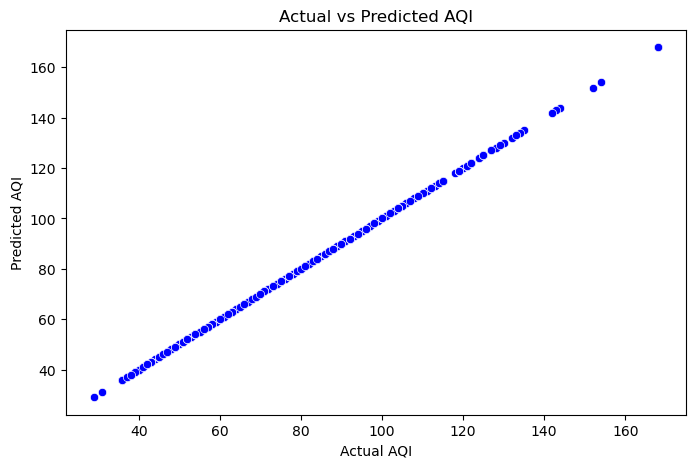

In [23]:
# Step 11: Visualize Actual vs Predicted AQI
plt.figure(figsize=(8,5))
sns.scatterplot(x=result_df['Actual_AQI'], y=result_df['Predicted_AQI'], color='blue')
plt.title('Actual vs Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()

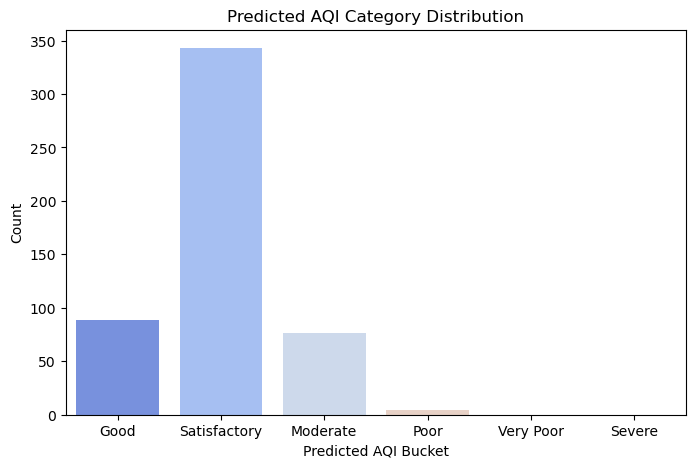

In [27]:
# Step 12: Visualize Bucket Comparison
plt.figure(figsize=(8,5))
sns.countplot(
    x=result_df['Predicted_Bucket'],
    order=labels,
    hue=result_df['Predicted_Bucket'],  # assign hue
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title('Predicted AQI Category Distribution')
plt.xlabel('Predicted AQI Bucket')
plt.ylabel('Count')
plt.show()